# **Intelligent Recommendation Techniques**

# ***Recommender System for Opening a New Restaurant in Kualalumpur, Malaysia***
### Created by Teguh Badrusalam
## Week 5 Final Report
- __Build a dataframe of neighborhoods in Kuala Lumpur, Malaysia by web scraping the data from Wikipedia page__
- __Get the geographical coordinates of the neighborhoods__
- __Obtain the venue data for the neighborhoods from Foursquare API__
- __Explore and cluster the neighborhoods__
- __Select the best cluster to open a new restaurant__
***
### 1. Import libraries

In [4]:
!conda install -c conda-forge geocoder -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### **2. Get data by data scraping**

In [6]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Suburbs_in_Kuala_Lumpur").text

In [7]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [8]:
# create a list to store neighborhood data
neighborhoodList = []

In [9]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [10]:
# create a new DataFrame from the list
kl_df = pd.DataFrame({"Neighborhood": neighborhoodList})

kl_df.head()

,Neighborhood
0,Alam Damai
1,"Ampang, Kuala Lumpur"
2,Bandar Menjalara
3,Bandar Sri Permaisuri
4,Bandar Tasik Selatan


In [11]:
# print the number of rows of the dataframe
kl_df.shape

(70, 1)

### **3. Get the geographical coordinates**

In [12]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Kuala Lumpur, Malaysia'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [13]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in kl_df["Neighborhood"].tolist() ]

In [14]:
coords

[[3.0576900000000364, 101.74388000000005],
 [3.158092785454847, 101.74870260727259],
 [3.1903500000000236, 101.62545000000006],
 [3.1039100000000417, 101.71226000000007],
 [3.072620000000029, 101.71471000000008],
 [3.08280000000002, 101.72281000000004],
 [3.1292000000000257, 101.67844000000008],
 [3.1347800000000348, 101.67262000000005],
 [3.111020000000053, 101.66283000000004],
 [3.09898000000004, 101.73499000000004],
 [3.1357600000000616, 101.70837000000006],
 [3.12916000000007, 101.68406000000004],
 [3.147770000000037, 101.70855000000006],
 [3.057800000000043, 101.68965000000009],
 [3.1434800000000678, 101.64433000000008],
 [3.152006489782151, 101.7010257388609],
 [3.129290000000026, 101.69892000000004],
 [3.17381000000006, 101.68276000000009],
 [3.061870000000056, 101.74675000000008],
 [3.163590000000056, 101.69811000000004],
 [3.147980000000075, 101.66798000000006],
 [3.1296448903634406, 101.64067633610652],
 [3.1296448903634406, 101.64067633610652],
 [3.156677705726515, 101.69804

In [14]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [15]:
# merge the coordinates into the original dataframe
kl_df['Latitude'] = df_coords['Latitude']
kl_df['Longitude'] = df_coords['Longitude']

In [51]:
# check the neighborhoods and the coordinates
print(kl_df.shape)
kl_df

(70, 3)


,Neighborhood,Latitude,Longitude
0,Alam Damai,3.057690,101.743880
1,"Ampang, Kuala Lumpur",3.158093,101.748703
2,Bandar Menjalara,3.190350,101.625450
3,Bandar Sri Permaisuri,3.103910,101.712260
4,Bandar Tasik Selatan,3.072620,101.714710
5,Bandar Tun Razak,3.082800,101.722810
6,Bangsar,3.129200,101.678440
7,Bangsar Park,3.134780,101.672620
8,Bangsar South,3.111020,101.662830
9,Batu 11 Cheras,3.098980,101.734990


In [16]:
# save the DataFrame as CSV file
kl_df.to_csv("kl_df.csv", index=False)

### **4. Create a map of Kuala Lumpur with neighborhoods superimposed on top**

In [17]:
# get the coordinates of Kuala Lumpur
address = 'Kuala Lumpur, Malaysia'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kuala Lumpur, Malaysiae {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kuala Lumpur, Malaysiae 3.1516636, 101.6943028.


In [18]:
# create map of Kuala Lumpur using latitude and longitude values
map_kl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(kl_df['Latitude'], kl_df['Longitude'], kl_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kl)  
    
map_kl

In [19]:
# save the map as HTML file
map_kl.save('map_kl.html')

### **5. Use the Foursquare API to explore the neighborhoods**

In [1]:
# define Foursquare Credentials and Version
CLIENT_ID = 'your forsquare ID, for sure' # your Foursquare ID
CLIENT_SECRET = 'your fq secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

**Now, let's get the top 100 venues that are within a radius of 2000 meters.**

In [21]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(kl_df['Latitude'], kl_df['Longitude'], kl_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [22]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

In [23]:
venues_df.head()

,0,1,2,3,4,5,6
0,Alam Damai,3.05769,101.74388,Pengedar Shaklee Kuala Lumpur,3.061235,101.740696,Supplement Shop
1,Alam Damai,3.05769,101.74388,Machi Noodle 妈子面,3.057695,101.746635,Noodle House
2,Alam Damai,3.05769,101.74388,Roti Canai Perindu,3.055071,101.740574,Breakfast Spot
3,Alam Damai,3.05769,101.74388,628火焰鑫茶室,3.058442,101.747947,Chinese Restaurant
4,Alam Damai,3.05769,101.74388,Restoran Ikbal,3.061134,101.750220,Restaurant


In [24]:
# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(6984, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Alam Damai,3.05769,101.74388,Pengedar Shaklee Kuala Lumpur,3.061235,101.740696,Supplement Shop
1,Alam Damai,3.05769,101.74388,Machi Noodle 妈子面,3.057695,101.746635,Noodle House
2,Alam Damai,3.05769,101.74388,Roti Canai Perindu,3.055071,101.740574,Breakfast Spot
3,Alam Damai,3.05769,101.74388,628火焰鑫茶室,3.058442,101.747947,Chinese Restaurant
4,Alam Damai,3.05769,101.74388,Restoran Ikbal,3.061134,101.750220,Restaurant


# Breakpoint:
## Saving results of Foursquare, so that we would not need to connect every time to Foursquare (and use our portions) .

In [35]:
#venues_df.to_csv('venues_df.csv')

### Loading Data from File (Saved "Foursquare " DataFrame for Venues)

In [64]:
#venues_kl = pd.read_csv('venues_df.csv')

**Let's check how many venues were returned for each neighorhood**

In [65]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Alam Damai,100,100,100,100,100,100
"Ampang, Kuala Lumpur",100,100,100,100,100,100
Bandar Menjalara,100,100,100,100,100,100
Bandar Sri Permaisuri,100,100,100,100,100,100
Bandar Tasik Selatan,94,94,94,94,94,94
Bandar Tun Razak,100,100,100,100,100,100
Bangsar,100,100,100,100,100,100
Bangsar Park,100,100,100,100,100,100
Bangsar South,100,100,100,100,100,100


**Let's find out how many unique categories can be curated from all the returned venues**

In [66]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 303 uniques categories.


In [67]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Supplement Shop', 'Noodle House', 'Breakfast Spot',
       'Chinese Restaurant', 'Restaurant', 'Food Court',
       'Vegetarian / Vegan Restaurant', 'Other Great Outdoors',
       'Snack Place', 'Asian Restaurant', 'Spa', 'Bubble Tea Shop',
       'Indian Restaurant', 'Food Truck', 'Japanese Restaurant', 'Park',
       'Dim Sum Restaurant', 'Seafood Restaurant', 'Farmers Market',
       'Cantonese Restaurant', 'Chinese Breakfast Place', 'Dessert Shop',
       'Convenience Store', 'Malay Restaurant', 'Bakery', 'Café',
       'Outlet Store', 'Steakhouse', 'Badminton Court',
       'Gym / Fitness Center', 'Athletics & Sports', 'Pet Store',
       'Middle Eastern Restaurant', 'Fast Food Restaurant',
       'Hakka Restaurant', 'Padangnese Restaurant', 'Winery',
       'Burger Joint', 'Grocery Store', 'College Bookstore',
       'Cupcake Shop', 'Thai Restaurant', 'Flea Market',
       'Salon / Barbershop', 'Italian Restaurant', 'Coffee Shop',
       'Juice Bar', 'Pizza Place', 'Pie S

In [68]:
# check if the results contain "Restaurant"
"Neighborhood" in venues_df['VenueCategory'].unique()

True

## **6. One Hot Encoding of Dataset**
#### **Analyze Each Neighborhood**

In [25]:
# one hot encoding
kl_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kl_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]

print(kl_onehot.shape)
kl_onehot.head()

(6984, 304)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Casino,Chaat Place,Chettinad Restaurant,Chinese Breakfast Place,Chinese Restaurant,Circus,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Bookstore,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kushikatsu Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lounge,Malay Restaurant,Mamak Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outlet Store,Padangnese Restaurant,Pakistani Restaurant,Palace,Park,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Racetrack,Ramen Restaurant,Recording Studio,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Ski Chalet,Ski Lodge,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Track,Track Stadi

**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [26]:
kl_grouped = kl_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(kl_grouped.shape)
kl_grouped

(70, 304)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Casino,Chaat Place,Chettinad Restaurant,Chinese Breakfast Place,Chinese Restaurant,Circus,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Bookstore,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kushikatsu Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lounge,Malay Restaurant,Mamak Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outlet Store,Padangnese Restaurant,Pakistani Restaurant,Palace,Park,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Racetrack,Ramen Restaurant,Recording Studio,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Ski Chalet,Ski Lodge,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Track,Track Stadi

In [27]:
len(kl_grouped[kl_grouped["Restaurant"] > 0])

60

# Plot correlation between features

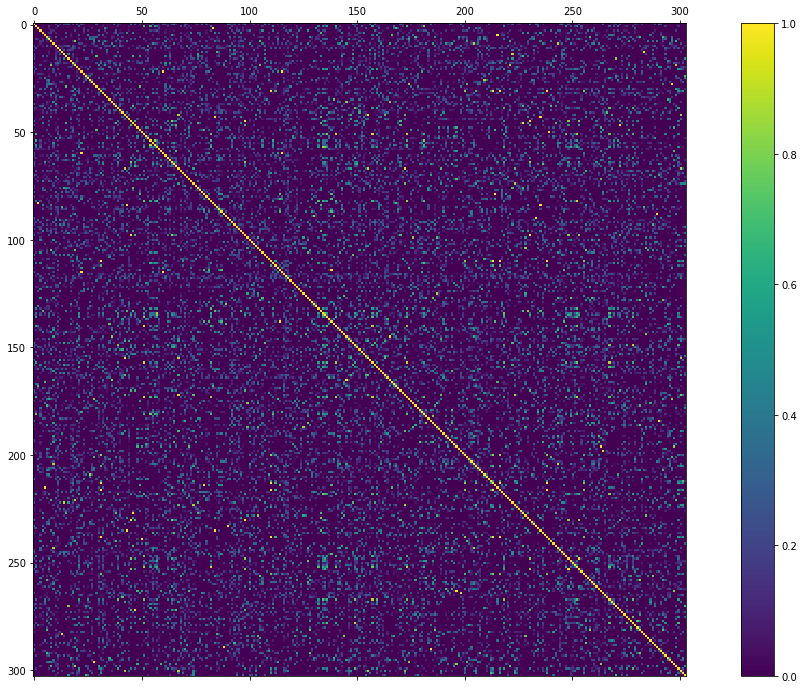

In [74]:
import matplotlib.pyplot as plt
import pandas
import numpy

correlations = kl_grouped.corr()
# plot correlation matrix
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

**Create a new DataFrame for "Restaurant" data only**

In [28]:
kl_restaurant = kl_grouped[["Neighborhoods","Restaurant"]]

In [29]:
kl_restaurant.head()

,Neighborhoods,Restaurant
0,Alam Damai,0.030000
1,"Ampang, Kuala Lumpur",0.020000
2,Bandar Menjalara,0.040000
3,Bandar Sri Permaisuri,0.020000
4,Bandar Tasik Selatan,0.021277


### **7. Cluster Neighborhoods**
Run k-means to cluster the neighborhoods in Kuala Lumpur into 3 clusters.

In [32]:
# set number of clusters
kclusters = 3

kl_clustering = kl_restaurant.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 1, 2, 2, 0, 0, 0, 2, 0], dtype=int32)

In [33]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
kl_merged = kl_restaurant.copy()

# add clustering labels
kl_merged["Cluster Labels"] = kmeans.labels_

In [34]:
kl_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
kl_merged.head()

,Neighborhood,Restaurant,Cluster Labels
0,Alam Damai,0.030000,2
1,"Ampang, Kuala Lumpur",0.020000,2
2,Bandar Menjalara,0.040000,1
3,Bandar Sri Permaisuri,0.020000,2
4,Bandar Tasik Selatan,0.021277,2


In [35]:
# merge kl_grouped with kl_data to add latitude/longitude for each neighborhood
kl_merged = kl_merged.join(kl_df.set_index("Neighborhood"), on="Neighborhood")

print(kl_merged.shape)
kl_merged.head() # check the last columns!

(70, 5)


,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
0,Alam Damai,0.030000,2,3.057690,101.743880
1,"Ampang, Kuala Lumpur",0.020000,2,3.158093,101.748703
2,Bandar Menjalara,0.040000,1,3.190350,101.625450
3,Bandar Sri Permaisuri,0.020000,2,3.103910,101.712260
4,Bandar Tasik Selatan,0.021277,2,3.072620,101.714710


In [36]:
# sort the results by Cluster Labels
print(kl_merged.shape)
kl_merged.sort_values(["Cluster Labels"], inplace=True)
kl_merged

(70, 5)


,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
23,Dang Wangi,0.010000,0,3.156678,101.698045
26,Happy Garden,0.000000,0,3.201630,101.721070
25,"Federal Hill, Kuala Lumpur",0.000000,0,3.136370,101.685640
31,"Kampung Baru, Kuala Lumpur",0.010000,0,3.165460,101.710280
48,Setiawangsa,0.010000,0,3.191781,101.740067
54,Taman Cheras Hartamas,0.000000,0,3.082630,101.746710
20,Damansara Heights,0.000000,0,3.147980,101.667980
19,Chow Kit,0.010000,0,3.163590,101.698110
35,Lembah Pantai,0.010000,0,3.121216,101.663897
60,Taman Midah,0.010000,0,3.093590,101.728370


**Finally, let's visualize the resulting clusters**

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['Neighborhood'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [76]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

### **8. Examine Clusters**

#### Cluster 0

In [38]:
kl_merged.loc[kl_merged['Cluster Labels'] == 0]

,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
23,Dang Wangi,0.01,0,3.156678,101.698045
26,Happy Garden,0.00,0,3.201630,101.721070
25,"Federal Hill, Kuala Lumpur",0.00,0,3.136370,101.685640
31,"Kampung Baru, Kuala Lumpur",0.01,0,3.165460,101.710280
48,Setiawangsa,0.01,0,3.191781,101.740067
54,Taman Cheras Hartamas,0.00,0,3.082630,101.746710
20,Damansara Heights,0.00,0,3.147980,101.667980
19,Chow Kit,0.01,0,3.163590,101.698110
35,Lembah Pantai,0.01,0,3.121216,101.663897
60,Taman Midah,0.01,0,3.093590,101.728370


#### Cluster 1

In [39]:
kl_merged.loc[kl_merged['Cluster Labels'] == 1]

,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
39,Mont Kiara,0.040000,1,3.165320,101.652430
41,"Pudu, Kuala Lumpur",0.040000,1,3.133540,101.713070
68,Titiwangsa,0.040000,1,3.180670,101.703220
33,Kepong,0.050000,1,3.217500,101.637630
42,Putrajaya,0.040000,1,3.123819,101.717327
50,Sri Hartamas,0.040000,1,3.162200,101.650360
46,Sentul Raya,0.040000,1,3.187434,101.691450
28,Jalan Duta,0.040000,1,3.180147,101.677868
2,Bandar Menjalara,0.040000,1,3.190350,101.625450
65,Taman Tun Dr Ismail,0.060000,1,3.152830,101.622710


#### Cluster 2

In [40]:
kl_merged.loc[kl_merged['Cluster Labels'] == 2]

,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
49,Shamelin,0.020000,2,3.124580,101.735970
51,Sri Petaling,0.030000,2,3.072600,101.682520
52,Sungai Besi,0.020000,2,3.050640,101.706130
53,Taman Bukit Maluri,0.020000,2,3.200660,101.633370
59,Taman Melati,0.020000,2,3.223570,101.723990
58,Taman Len Seng,0.030000,2,3.069080,101.742870
57,Taman Ibukota,0.030000,2,3.212160,101.715400
56,Taman Desa,0.020000,2,3.102970,101.684710
62,Taman P. Ramlee,0.032967,2,3.193600,101.705980
0,Alam Damai,0.030000,2,3.057690,101.743880


#### Observations:
Most of the restaurant mall are concentrated in the central area of Kuala Lumpur city, with the highest number in cluster 2 and moderate number in cluster 0. On the other hand, cluster 1 has very low number to totally no restaurant in the neighborhoods. This represents a great opportunity and high potential areas to open new restaurant as there is very little to no competition from existing restaurant. Meanwhile, shopping malls in cluster 2 are likely suffering from intense competition due to oversupply and high concentration of restaurant. From another perspective, this also shows that the oversupply of restaurant mostly happened in the central area of the city, with the suburb area still have very few restaurant. Therefore, this project recommends property developers to capitalize on these findings to open new restaurant in neighborhoods in cluster 1 with little to no competition. Property developers with unique selling propositions to stand out from the competition can also open new restaurant in neighborhoods in cluster 0 with moderate competition. Lastly, property developers are advised to avoid neighborhoods in cluster 2 which already have high concentration of restaurant and suffering from intense competition.